#### Importing Libraries

In [114]:
# Importing necessary libraries
import time                   # For time-related operations
import pydotplus               # For generating dot files for decision trees
import numpy as np             # For numerical operations
import pandas as pd            # For data manipulation
import seaborn as sns          # For data visualization
import matplotlib.pyplot as plt # For plotting
from IPython.display import Image # For displaying images in Jupyter Notebook
from sklearn import tree, ensemble  # For decision tree and ensemble methods
from xgboost import XGBClassifier  # For XGBoost classifier
from lightgbm import LGBMClassifier  # For LightGBM classifier
from catboost import CatBoostClassifier  # For CatBoost classifier
from sklearn.preprocessing import StandardScaler  # For standardization of data
from sklearn.neural_network import MLPClassifier  # For Multilayer Perceptron classifier
from sklearn.model_selection import train_test_split, GridSearchCV  # For train-test split and grid search
from sklearn.linear_model import LogisticRegression  # For logistic regression classifier
from sklearn.neighbors import KNeighborsClassifier  # For k-nearest neighbors classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # For LDA classifier
from sklearn.metrics import (classification_report, accuracy_score, roc_auc_score, 
                             confusion_matrix, roc_curve)  # For classification metrics

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings

#### Importing Data

In [115]:
# Reading the Excel file into a DataFrame
df = pd.read_excel(r"C:\Users\jatin\Downloads\sydney_rain prediction.xlsx")

# Displaying the first 5 rows of the DataFrame to inspect the data
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-02-01   Sydney     19.5     22.4      15.6          6.2       0.0   
1 2008-02-02   Sydney     19.5     25.6       6.0          3.4       2.7   
2 2008-02-03   Sydney     21.6     24.5       6.6          2.4       0.1   
3 2008-02-04   Sydney     20.2     22.8      18.8          2.2       0.0   
4 2008-02-05   Sydney     19.7     25.7      77.4          NaN       0.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  
0     20.7     20.9       Yes          Yes  
1     22.4     24.8       Yes          Yes  
2     23.5     23.0       Yes          Yes  
3     21.4     20.9       Yes          Yes  
4     22.5     25.5       Yes          Yes

#### Data Preprocessing

In [116]:
# Printing the shape of the DataFrame to show the number of rows and columns
print("Data Shape: ", df.shape)

# Printing the information about the DataFrame like data types of each column
print(df.info())

Data Shape:  (3337, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     

In [117]:
# Creating dummy variables for categorical columns 'RainToday' and 'RainTomorrow'
# drop_first=True is used to dropping the first dummy variable for each categorical feature
df = pd.get_dummies(df, columns=['RainToday', 'RainTomorrow'], drop_first=True)

# Displaying the first 5 rows of the DataFrame after creating dummy variables
df.head()


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-02-01   Sydney     19.5     22.4      15.6          6.2       0.0   
1 2008-02-02   Sydney     19.5     25.6       6.0          3.4       2.7   
2 2008-02-03   Sydney     21.6     24.5       6.6          2.4       0.1   
3 2008-02-04   Sydney     20.2     22.8      18.8          2.2       0.0   
4 2008-02-05   Sydney     19.7     25.7      77.4          NaN       0.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   

   Temp9am  Temp3pm  RainToday_Yes  RainTomorrow_Yes  
0     20.7     20.9              1                 1  
1     22.4     24.8              1                 1  
2     23.5     23.0              1                 1  
3     21.4     20.9              1                 1  
4     22.5     25.5              1                 1

##### Dealing with missing values

<AxesSubplot: >

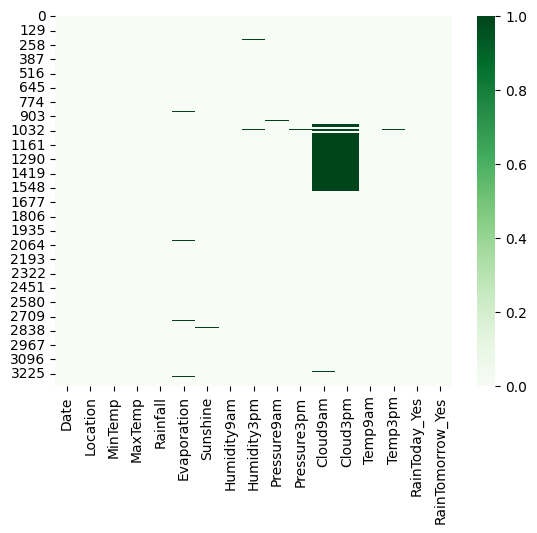

In [118]:
# Creating a heatmap to visualize the missing values in the DataFrame
# True values represent missing values (NaNs) and will be colored in green
sns.heatmap(df.isnull(), cmap='Greens')

In [119]:
# Counting the total number of missing values for each column and sorting them in descending order
total = df.isnull().sum().sort_values(ascending=False)

# Displaying the total number of missing values for each column
total


Cloud9am            566
Cloud3pm            561
Evaporation          51
Pressure9am          20
Pressure3pm          19
Sunshine             16
Humidity9am          14
Humidity3pm          13
Rainfall              6
Temp3pm               4
Temp9am               4
MinTemp               3
MaxTemp               2
RainToday_Yes         0
Date                  0
Location              0
RainTomorrow_Yes      0
dtype: int64

In [120]:
# Filling missing values in the 'Rainfall' column with the mode (most frequent value)
df['Rainfall'].fillna(df['Rainfall'].mode()[0], inplace=True)

# Filling missing values in the 'MinTemp' column with the mode (most frequent value)
df['MinTemp'].fillna(df['MinTemp'].mode()[0], inplace=True)

# Filling missing values in the 'MaxTemp' column with the mode (most frequent value)
df['MaxTemp'].fillna(df['MaxTemp'].mode()[0], inplace=True)

# Filling missing values in the 'Evaporation' column with the mode (most frequent value)
df['Evaporation'].fillna(df['Evaporation'].mode()[0], inplace=True)

# Filling missing values in the 'Sunshine' column with the mode (most frequent value)
df['Sunshine'].fillna(df['Sunshine'].mode()[0], inplace=True)

# Filling missing values in the 'Humidity9am' column with the mode (most frequent value)
df['Humidity9am'].fillna(df['Humidity9am'].mode()[0], inplace=True)

# Filling missing values in the 'Humidity3pm' column with the mode (most frequent value)
df['Humidity3pm'].fillna(df['Humidity3pm'].mode()[0], inplace=True)

# Filling missing values in the 'Pressure9am' column with the mode (most frequent value)
df['Pressure9am'].fillna(df['Pressure9am'].mode()[0], inplace=True)

# Filling missing values in the 'Pressure3pm' column with the mode (most frequent value)
df['Pressure3pm'].fillna(df['Pressure3pm'].mode()[0], inplace=True)

# Filling missing values in the 'Cloud9am' column with the mode (most frequent value)
df['Cloud9am'].fillna(df['Cloud9am'].mode()[0], inplace=True)

# Filling missing values in the 'Cloud3pm' column with the mode (most frequent value)
df['Cloud3pm'].fillna(df['Cloud3pm'].mode()[0], inplace=True)

# Filling missing values in the 'Temp9am' column with the mode (most frequent value)
df['Temp9am'].fillna(df['Temp9am'].mode()[0], inplace=True)

# Filling missing values in the 'Temp3pm' column with the mode (most frequent value)
df['Temp3pm'].fillna(df['Temp3pm'].mode()[0], inplace=True)


In [121]:
# Displaying the concise summary to verify that missing values have been filled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3337 non-null   datetime64[ns]
 1   Location          3337 non-null   object        
 2   MinTemp           3337 non-null   float64       
 3   MaxTemp           3337 non-null   float64       
 4   Rainfall          3337 non-null   float64       
 5   Evaporation       3337 non-null   float64       
 6   Sunshine          3337 non-null   float64       
 7   Humidity9am       3337 non-null   float64       
 8   Humidity3pm       3337 non-null   float64       
 9   Pressure9am       3337 non-null   float64       
 10  Pressure3pm       3337 non-null   float64       
 11  Cloud9am          3337 non-null   float64       
 12  Cloud3pm          3337 non-null   float64       
 13  Temp9am           3337 non-null   float64       
 14  Temp3pm           3337 n

##### Deleting Unuseful Columns

In [122]:
# Dropping the 'Date' and 'Location' columns from the DataFrame
df = df.drop(['Date', 'Location'], axis=1)

##### Outlier Treatment

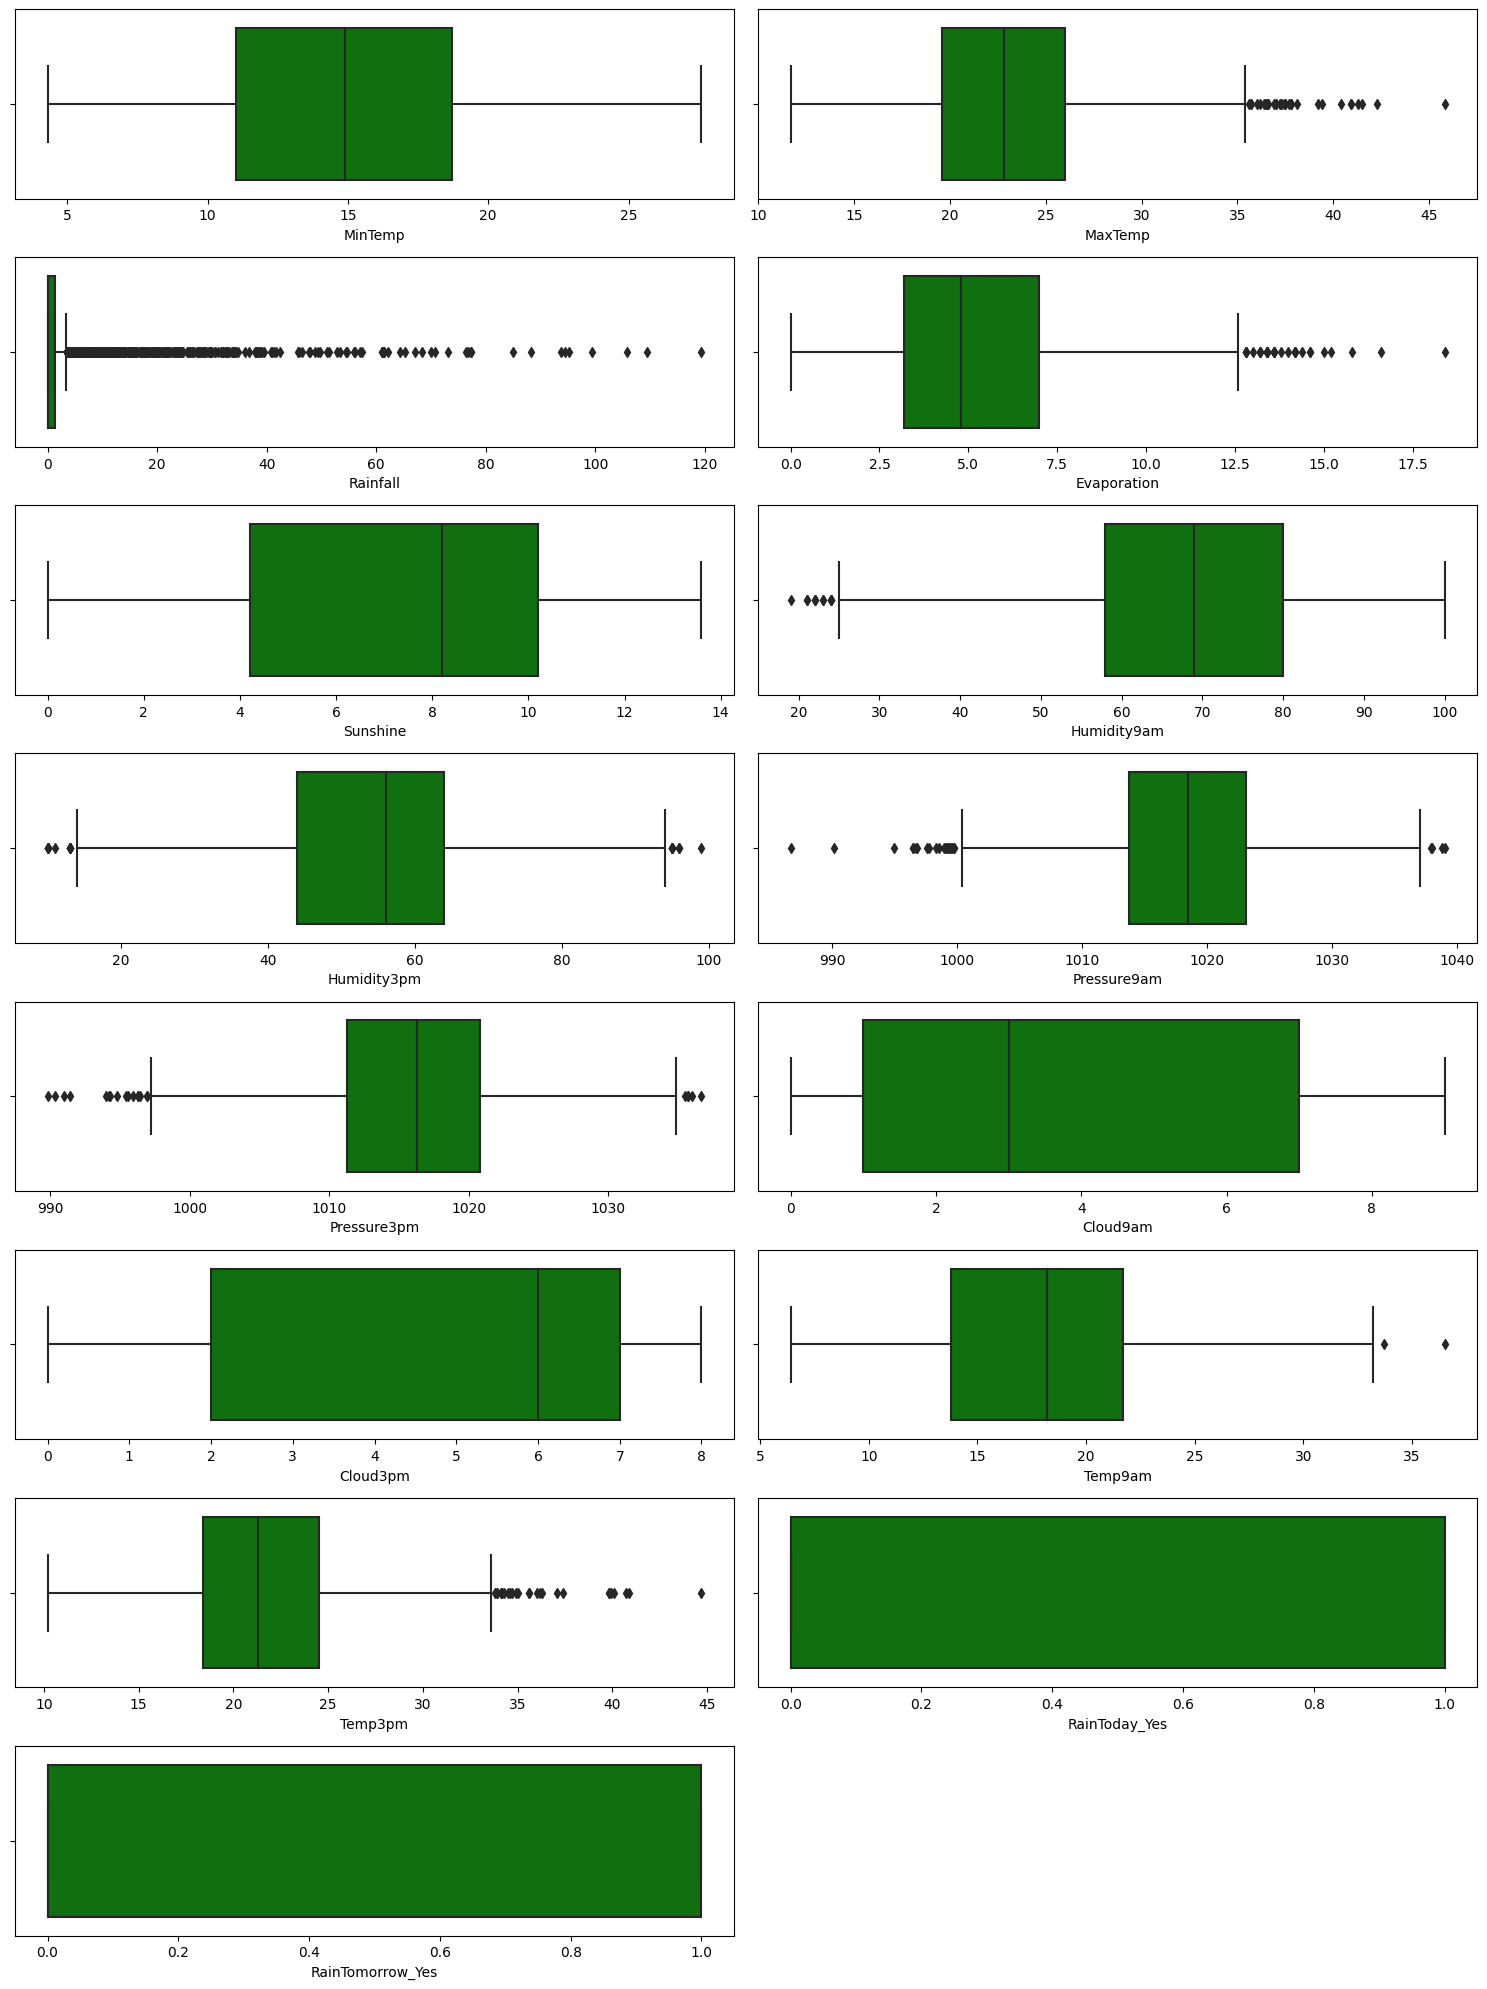

In [123]:
# Checking the outliers
# Calculating the number of rows and columns for the subplot grid
n_rows = (len(df.columns) + 1) // 2
n_cols = 2

# Create subplots with specified number of rows and columns
# Set the figure size to (15, 20)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot boxplots for each column in the DataFrame
for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i], color="green")

# Remove any extra empty subplots
for j in range(len(df.columns), n_rows * n_cols):
    fig.delaxes(axes[j])

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plot
plt.show()


In [124]:
# Calculate the first quartile (Q1)
Q1 = df.quantile(.25)

# Calculate the third quartile (Q3)
Q3 = df.quantile(.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper limits for outlier detection
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Clip the values in the DataFrame to the calculated lower and upper limits to handle outliers
df = df.clip(lower=lower_limit, upper=upper_limit, axis=1)


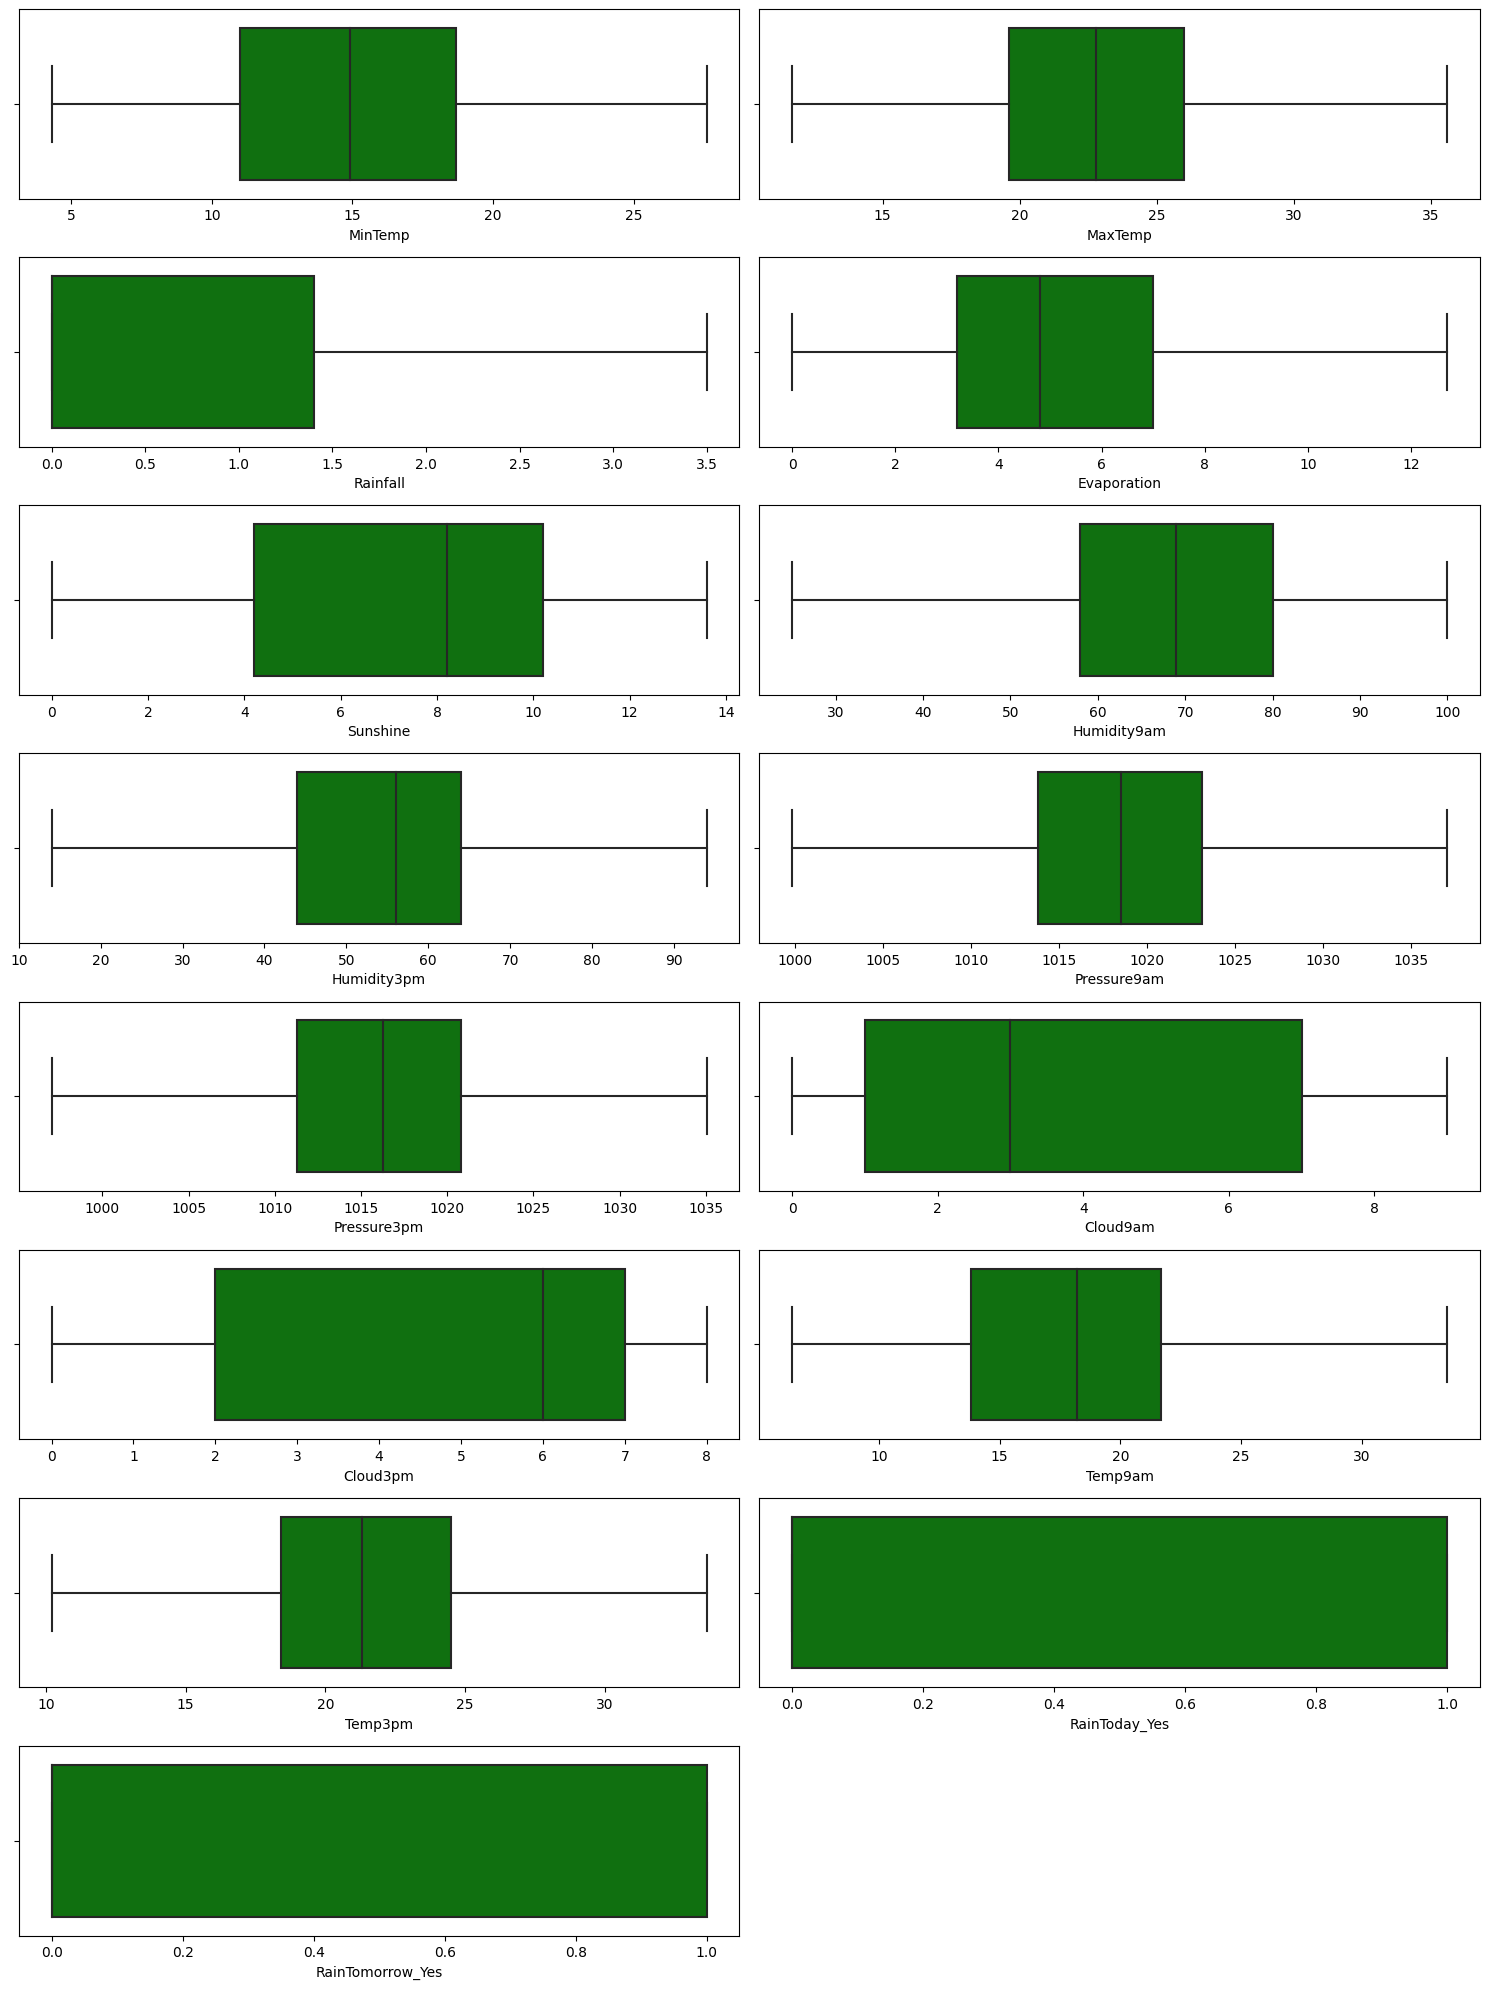

In [125]:
# Checking the outliers again
# Calculate the number of rows and columns for the subplot grid
n_rows = (len(df.columns) + 1) // 2
n_cols = 2

# Create subplots with the specified number of rows and columns
# Set the figure size to (15, 20)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot boxplots for each column in the DataFrame
for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i], color="green")

# Remove any extra empty subplots
for j in range(len(df.columns), n_rows * n_cols):
    fig.delaxes(axes[j])

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plot
plt.show()


##### Checking Correlation

<AxesSubplot: >

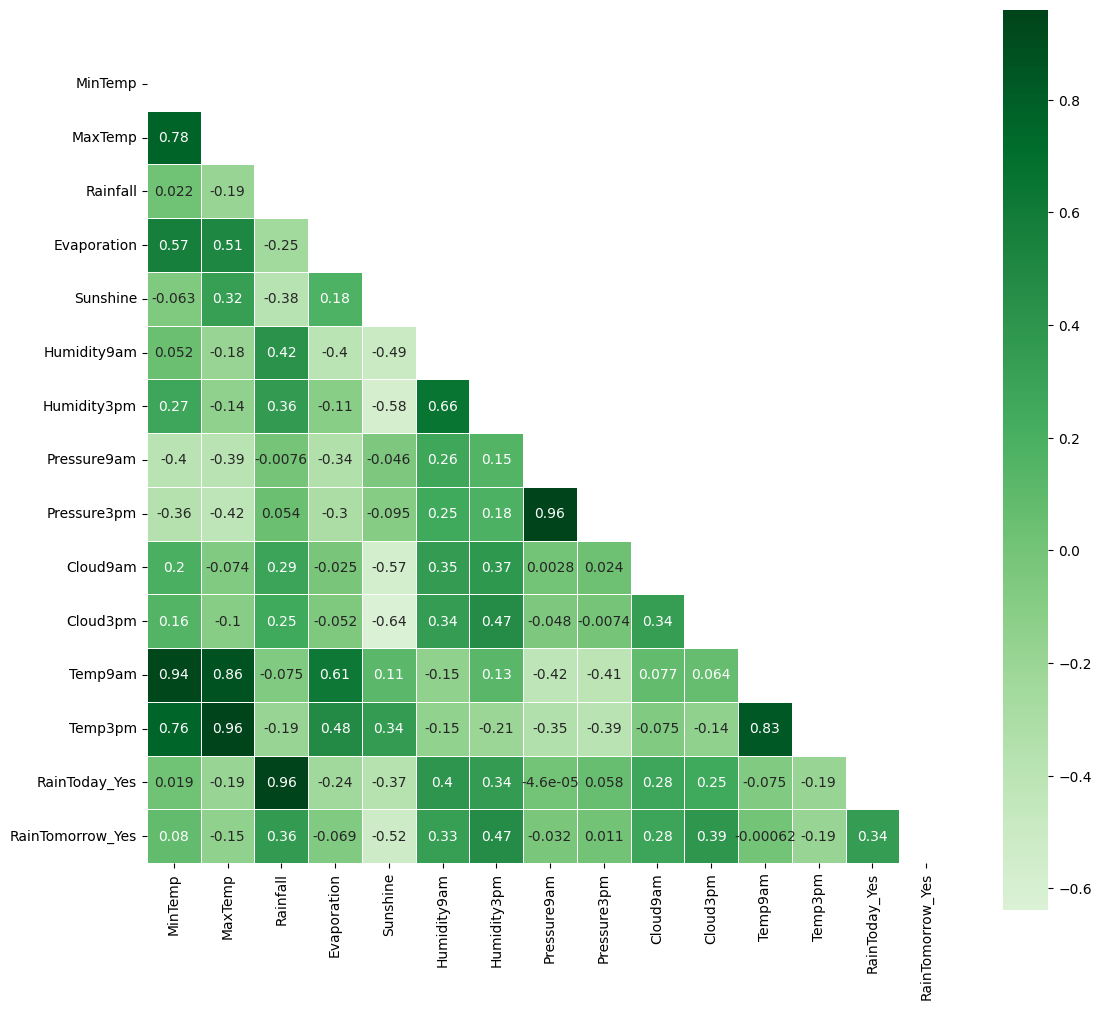

In [14]:
# Calculate the correlation matrix
corr = df.corr()

# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=np.bool_))

# Create a heatmap to visualize the correlation matrix
# Set the figure size to (13, 13)
f, ax = plt.subplots(figsize=(13, 13))

# Customize the heatmap using seaborn
sns.heatmap(corr, 
            mask=mask,        # Apply the mask to hide the upper triangle
            cmap="Greens",    # Set the color map to 'Greens'
            center=0,         # Center the color map at 0
            square=True,      # Make the heatmap square
            annot=True,       # Display the correlation values on the heatmap
            linewidths=.5,    # Set the linewidths for the heatmap
            cbar_kws={'shrink': .9})  # Customize the color bar


In [15]:
# Retrieve the column names of the DataFrame df
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday_Yes', 'RainTomorrow_Yes'],
      dtype='object')

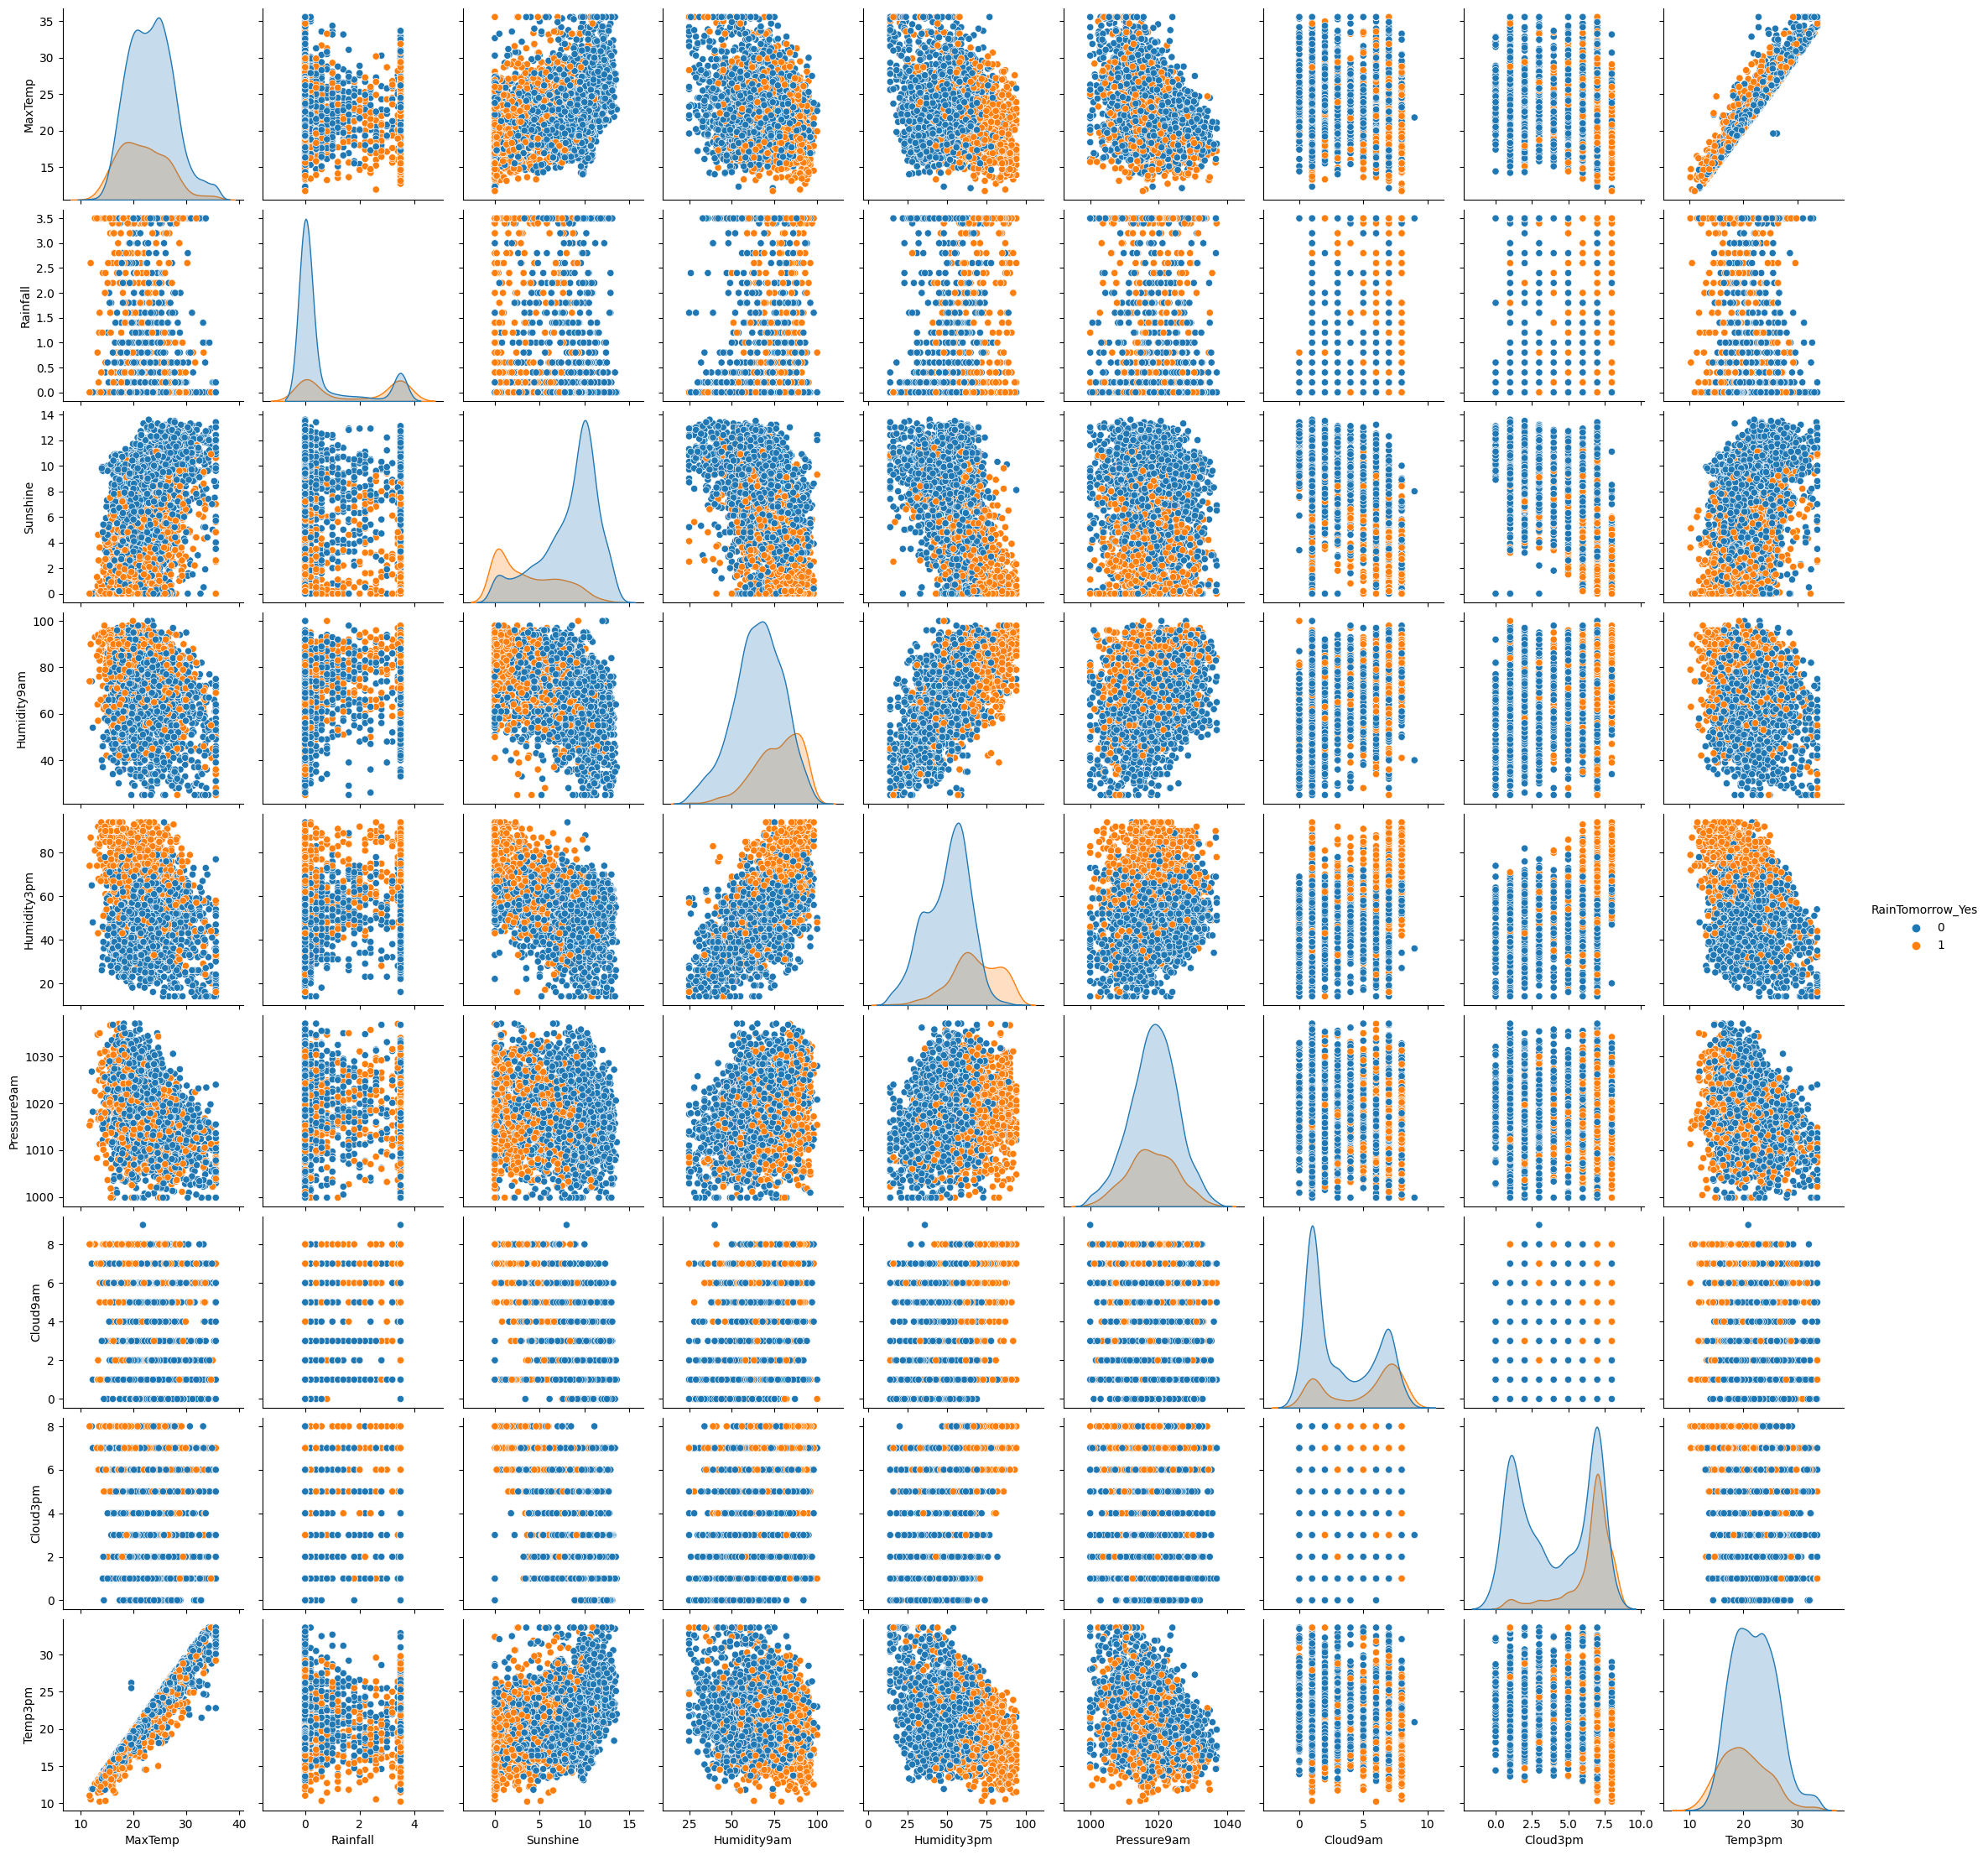

In [16]:
# Create a pairplot to visualize pairwise relationships between selected columns
sns.pairplot(data=df, vars=('MaxTemp', 'Rainfall', 'Sunshine',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud9am',
       'Cloud3pm', 'Temp3pm'), hue='RainTomorrow_Yes')

#### Data Splitting

In [17]:
# Splitting the DataFrame into features (X) and target variable (y)
# X contains all columns except 'RainTomorrow_Yes'
X = df.drop('RainTomorrow_Yes', axis=1)

# y contains the 'RainTomorrow_Yes' column
y = df['RainTomorrow_Yes']

In [18]:
# Splitting the data into training and testing sets using a 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [19]:
# Checking the shape of X_train, X_test
X_train.shape, X_test.shape

((2669, 14), (668, 14))

In [20]:
def plot_roc_cur(fper, tper):
    """
    Function to plot the ROC curve.
    
    Parameters:
    fper: False Positive Rate
    tper: True Positive Rate
    """
    # Plot the ROC curve
    plt.plot(fper, tper, color='green', label='ROC')
    
    # Plot the diagonal line (random classifier)
    plt.plot([0, 1], [0, 1], color='lightgreen', linestyle='--')
    
    # Set the labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
    # Add legend and grid
    plt.legend()
    plt.grid(True)
    
    # Display the plot
    plt.show()


In [126]:
def run_model(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    """
    Function to train, evaluate, and visualize the performance of a given model.
    
    Parameters:
    model: The machine learning model to be trained and evaluated.
    X_train, y_train: The training features and target variable.
    X_test, y_test: The testing features and target variable.
    
    Returns:
    train_accuracy: Accuracy of the model on the training set.
    test_accuracy: Accuracy of the model on the testing set.
    roc_auc: ROC Area Under Curve score.
    time_taken: Time taken to train the model.
    """
    
    # Record the start time
    t0 = time.time()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy scores
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Calculate the time taken
    time_taken = (time.time() - t0)
    
    # Print the evaluation metrics
    print("Train Accuracy = {}".format(train_accuracy))
    print("Test Accuracy = {}".format(test_accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test, y_pred, digits=5))
    
    # Calculate and plot ROC curve
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    # Plot the confusion matrix
    cf = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf, annot=True, fmt='d', cmap="Greens")
    
    # Return the trained model and evaluation metrics
    return train_accuracy, test_accuracy, roc_auc, time_taken


#### Model Creation

##### 1. Logistic Regression

Train Accuracy = 0.8358935931060322
Test Accuracy = 0.8323353293413174
ROC Area under Curve = 0.7634314156053288
Time taken = 0.060007333755493164
              precision    recall  f1-score   support

           0    0.88327   0.89723   0.89020       506
           1    0.66234   0.62963   0.64557       162

    accuracy                        0.83234       668
   macro avg    0.77280   0.76343   0.76788       668
weighted avg    0.82969   0.83234   0.83087       668



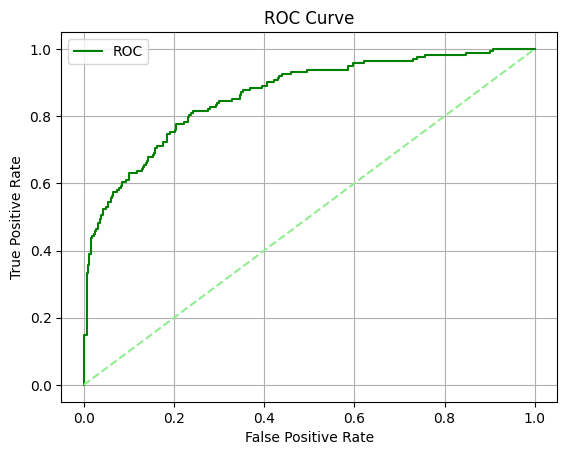

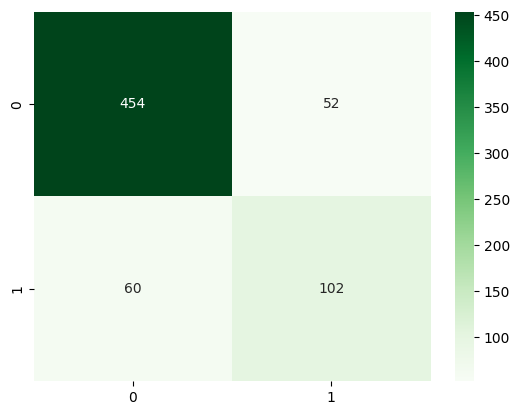

In [127]:
# Initializing Logistic Regression model
lr = LogisticRegression()

# Run the model and store the results
train_accuracy_lr, test_accuracy_lr, roc_auc_lr, tt_lr = run_model(lr)

##### 2. Linear Discriminant Analysis(LDA)

Train Accuracy = 0.8302735106781566
Test Accuracy = 0.8233532934131736
ROC Area under Curve = 0.7658956716927733
Time taken = 0.012048006057739258
              precision    recall  f1-score   support

           0    0.88800   0.87747   0.88270       506
           1    0.63095   0.65432   0.64242       162

    accuracy                        0.82335       668
   macro avg    0.75948   0.76590   0.76256       668
weighted avg    0.82566   0.82335   0.82443       668



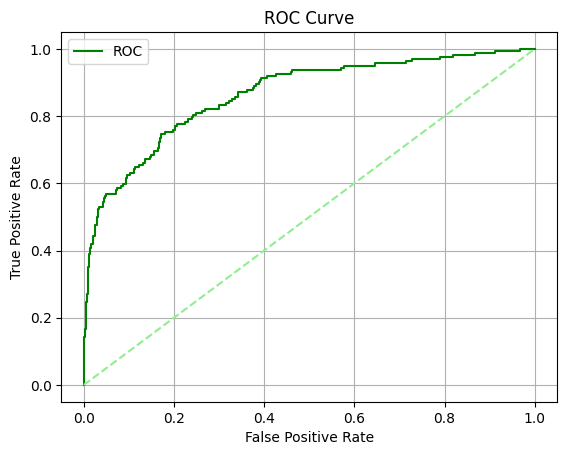

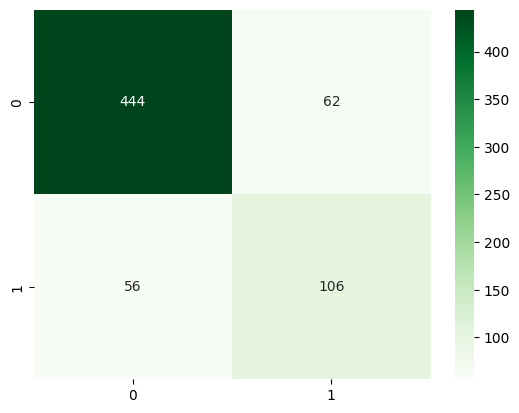

In [128]:
# Initializing Linear Discriminant Analysis (LDA) model
lda = LinearDiscriminantAnalysis()

# Run the model and store the results
train_accuracy_lda, test_accuracy_lda, roc_auc_lda, tt_lda = run_model(lda)


##### 3. K_Nearest_Neighbors(KNN)

Train Accuracy = 0.8370176095916073
Test Accuracy = 0.8203592814371258
ROC Area under Curve = 0.721953837895867
Time taken = 0.1570427417755127
              precision    recall  f1-score   support

           0    0.85874   0.91304   0.88506       506
           1    0.66154   0.53086   0.58904       162

    accuracy                        0.82036       668
   macro avg    0.76014   0.72195   0.73705       668
weighted avg    0.81091   0.82036   0.81327       668



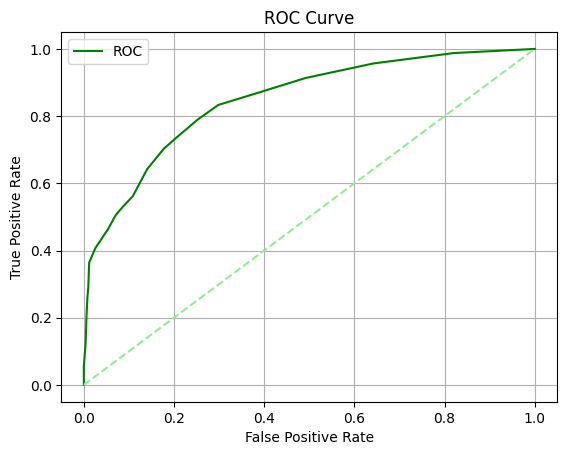

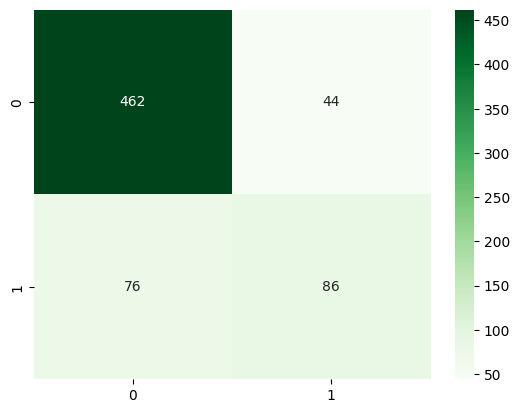

In [129]:
# Initializing StandardScaler and fit it to the training data
scaler = StandardScaler().fit(X_train)

# Transform the test and training data using the fitted scaler
X_test_s = scaler.transform(X_test)  # data transformation
X_train_s = scaler.transform(X_train)

# Initializing K-Nearest Neighbors (KNN) classifier with 20 neighbors
knn = KNeighborsClassifier(n_neighbors=20)

# Run the model with scaled data and store the results
train_accuracy_knn, test_accuracy_knn, roc_auc_knn, tt_knn = run_model(knn, X_train=X_train_s, X_test=X_test_s)


##### 4. Decision Tree

Train Accuracy = 0.8302735106781566
Test Accuracy = 0.8488023952095808
ROC Area under Curve = 0.7386302639925829
Time taken = 0.010013818740844727
              precision    recall  f1-score   support

           0    0.86225   0.95257   0.90516       506
           1    0.77982   0.52469   0.62731       162

    accuracy                        0.84880       668
   macro avg    0.82104   0.73863   0.76624       668
weighted avg    0.84226   0.84880   0.83778       668



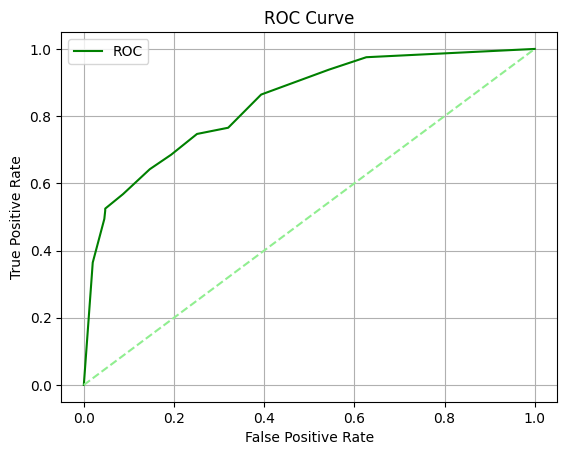

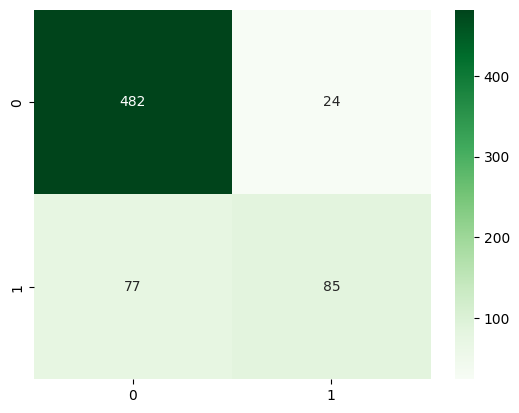

In [130]:
# Initializing Decision Tree Classifier with max_depth=4 and max_features='sqrt'
dt = tree.DecisionTreeClassifier(max_depth=4, max_features='sqrt')

# Run the model and store the results
train_accuracy_dt, test_accuracy_dt, roc_auc_dt, tt_dt = run_model(dt)

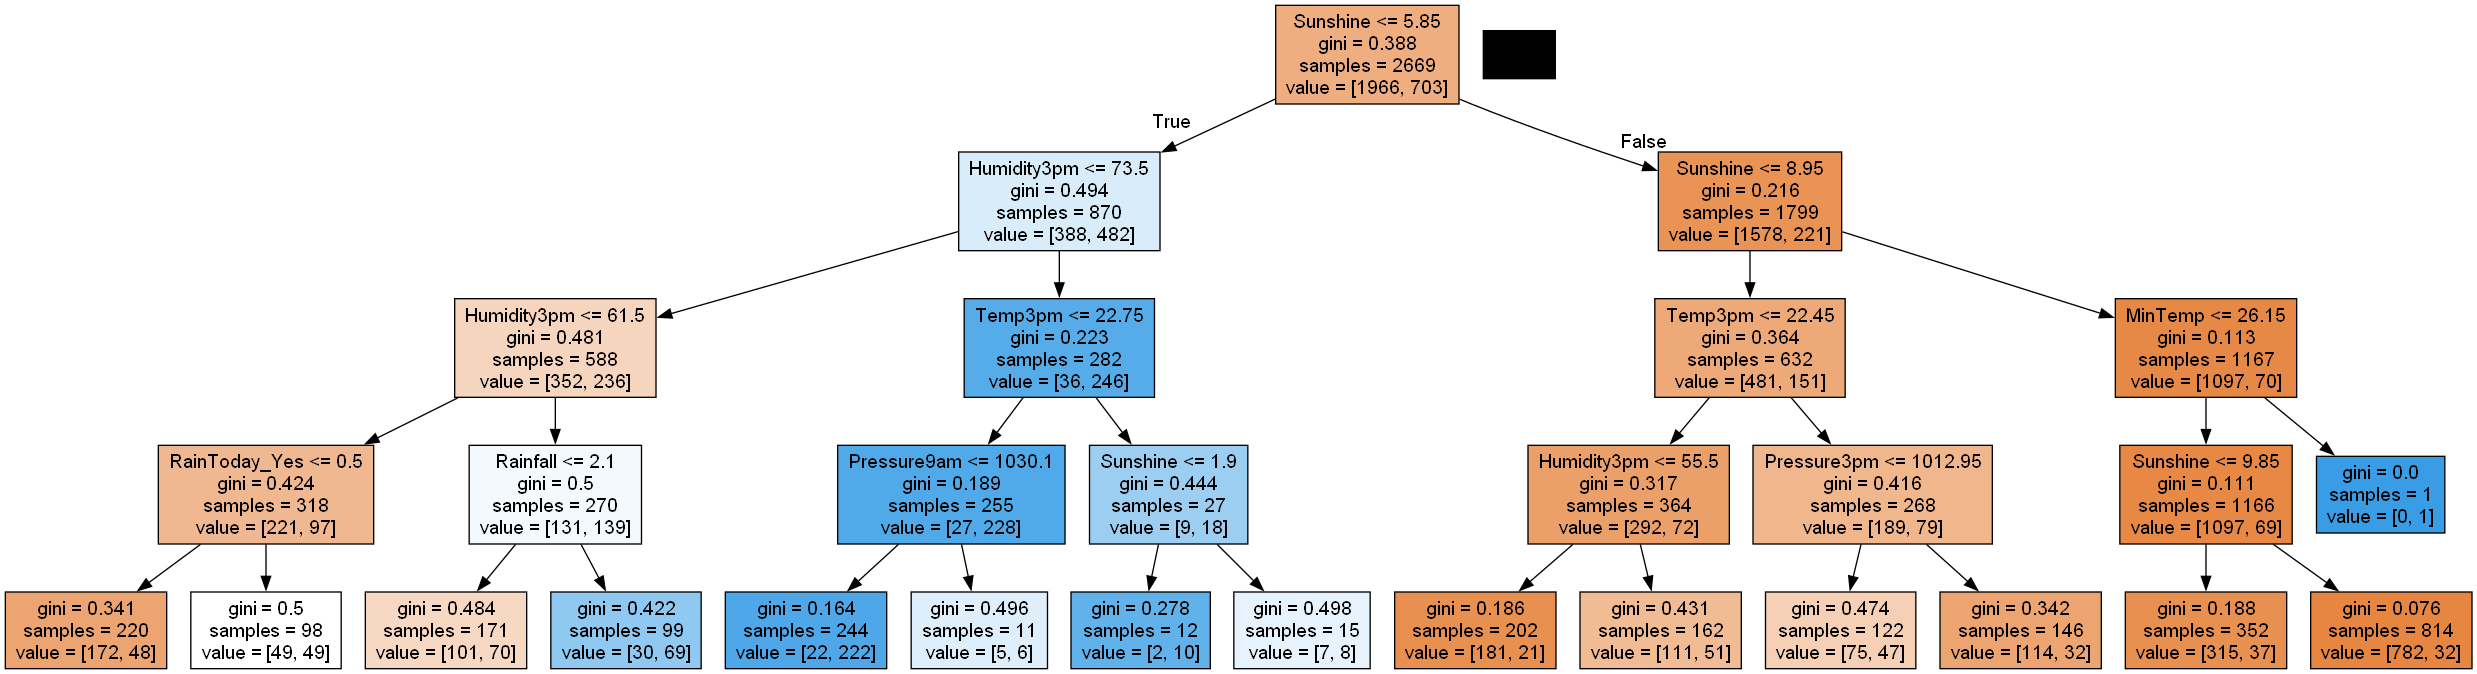

In [131]:
# Generating DOT data for the Decision Tree
dot_data = tree.export_graphviz(dt, feature_names=X_train.columns, filled=True)

# Creating graph from the DOT data using pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the Decision Tree using Image
Image(graph.create_png())

##### 5. Random Forest

Train Accuracy = 0.8430123641813413
Test Accuracy = 0.8562874251497006
ROC Area under Curve = 0.754062362758015
Time taken = 0.16899895668029785
              precision    recall  f1-score   support

           0    0.87004   0.95257   0.90943       506
           1    0.78947   0.55556   0.65217       162

    accuracy                        0.85629       668
   macro avg    0.82975   0.75406   0.78080       668
weighted avg    0.85050   0.85629   0.84704       668



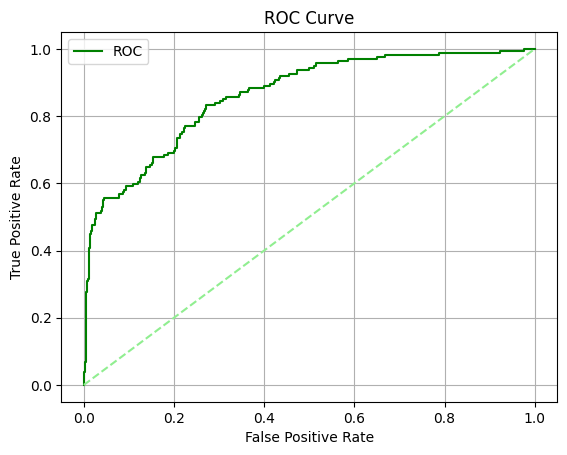

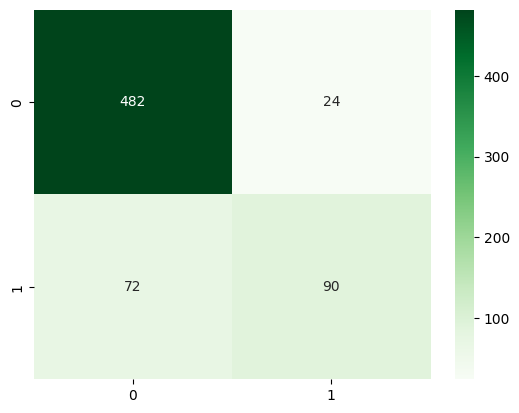

In [27]:
# Defining hyperparameters for Random Forest Classifier
params = {
    'max_depth': 4,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 100
}

# Initializing Random Forest Classifier with the defined hyperparameters
rf = ensemble.RandomForestClassifier(**params)

# Run the model and store the results
train_accuracy_rf, test_accuracy_rf, roc_auc_rf, tt_rf = run_model(rf)


##### 5A. Random Forest(Grid Search)

Train Accuracy = 0.8516298239040839
Test Accuracy = 0.8473053892215568
ROC Area under Curve = 0.7481335090030743
Time taken = 4.510575771331787
              precision    recall  f1-score   support

           0    0.86861   0.94071   0.90323       506
           1    0.75000   0.55556   0.63830       162

    accuracy                        0.84731       668
   macro avg    0.80931   0.74813   0.77076       668
weighted avg    0.83985   0.84731   0.83898       668



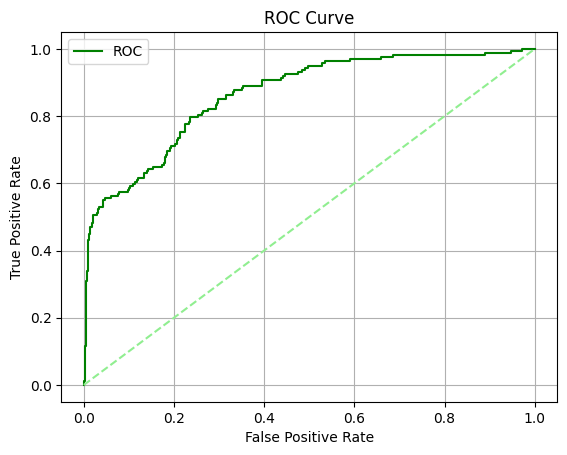

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=200)


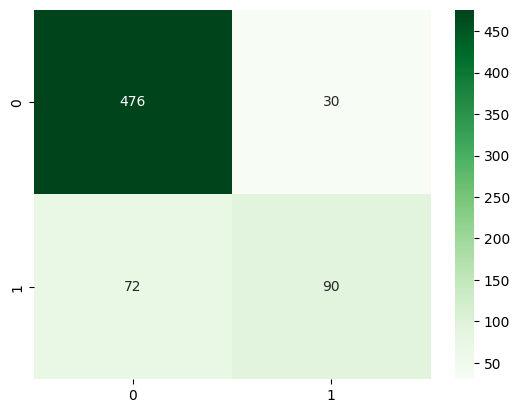

In [135]:
# Defining a dictionary of hyperparameters for Random Forest Classifier for grid search
param_grid = {
    'n_estimators': [100, 200],           # Number of trees in the Random Forest
    'max_depth': [None, 4, 5],             # Maximum depth of individual decision trees
    'min_samples_split': [2, 5],        # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 5],         # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt']               # Number of features to consider for the best split
}

# Initializing GridSearchCV with the Random Forest Classifier
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Run the model and store the results
train_accuracy_gs, test_accuracy_gs, roc_auc_gs, tt_gs = run_model(grid_search)

# Print the best estimator found by GridSearchCV
print(grid_search.best_estimator_)


##### 6. Bagging

Train Accuracy = 0.8433870363431997
Test Accuracy = 0.8502994011976048
ROC Area under Curve = 0.7459132386668618
Time taken = 0.41024351119995117
              precision    recall  f1-score   support

           0    0.86643   0.94862   0.90566       506
           1    0.77193   0.54321   0.63768       162

    accuracy                        0.85030       668
   macro avg    0.81918   0.74591   0.77167       668
weighted avg    0.84351   0.85030   0.84067       668



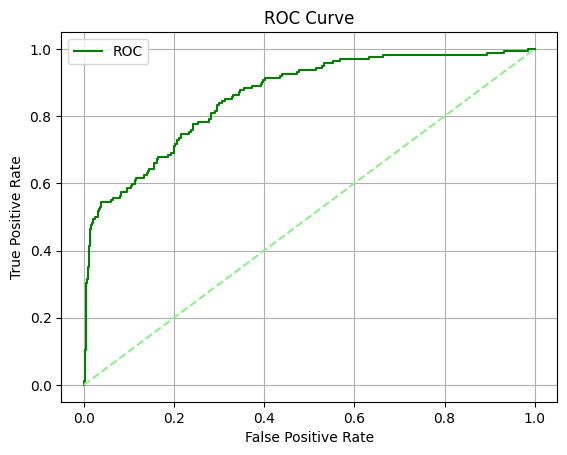

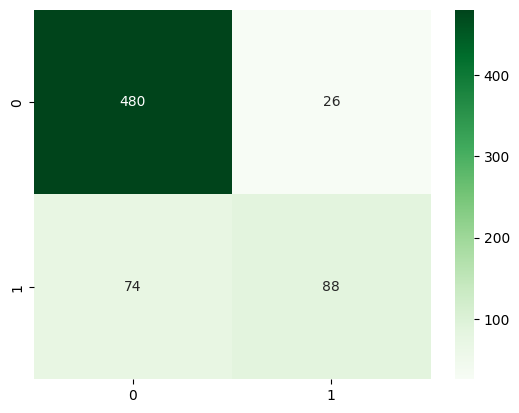

In [29]:
# Initializing Bagging Classifier with Decision Tree as the base estimator, 1000 estimators, and using bootstrap sampling
bag = ensemble.BaggingClassifier(base_estimator=dt, n_estimators=1000, bootstrap=True, n_jobs=-1)

# Run the model and store the results
train_accuracy_bag, test_accuracy_bag, roc_auc_bag, tt_bag = run_model(bag)


##### 6. AdaBoost

Train Accuracy = 0.8351442487823155
Test Accuracy = 0.8488023952095808
ROC Area under Curve = 0.7386302639925829
Time taken = 14.384565353393555
              precision    recall  f1-score   support

           0    0.86225   0.95257   0.90516       506
           1    0.77982   0.52469   0.62731       162

    accuracy                        0.84880       668
   macro avg    0.82104   0.73863   0.76624       668
weighted avg    0.84226   0.84880   0.83778       668



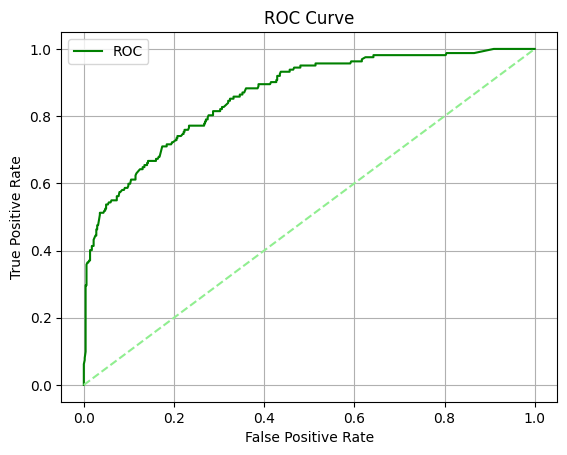

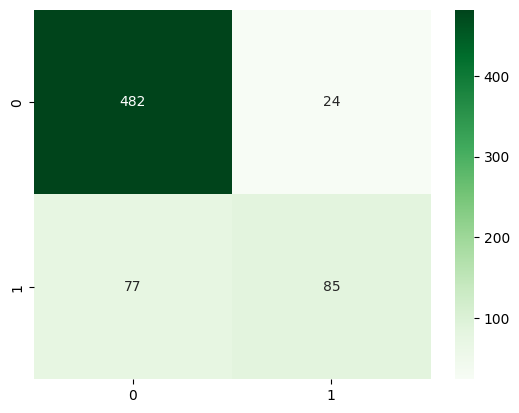

In [137]:
# Initializing AdaBoost Classifier
ada = ensemble.AdaBoostClassifier(learning_rate=0.001, n_estimators=5000)

# Run the model and store the results
train_accuracy_ada, test_accuracy_ada, roc_auc_ada, tt_ada = run_model(ada)

##### 8. XGBoost

Train Accuracy = 0.8452603971524916
Test Accuracy = 0.8398203592814372
ROC Area under Curve = 0.7620772946859904
Time taken = 0.05500030517578125
              precision    recall  f1-score   support

           0    0.88000   0.91304   0.89622       506
           1    0.69231   0.61111   0.64918       162

    accuracy                        0.83982       668
   macro avg    0.78615   0.76208   0.77270       668
weighted avg    0.83448   0.83982   0.83631       668



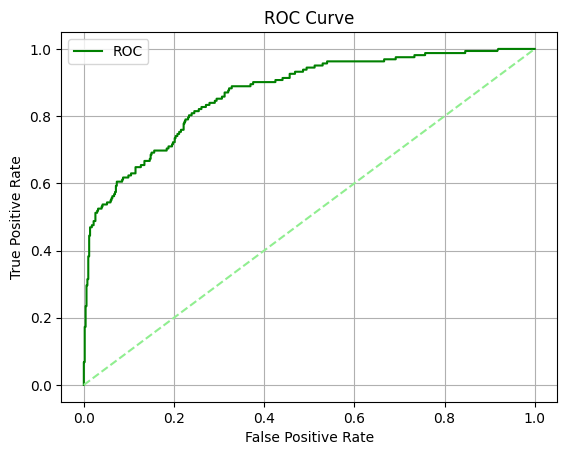

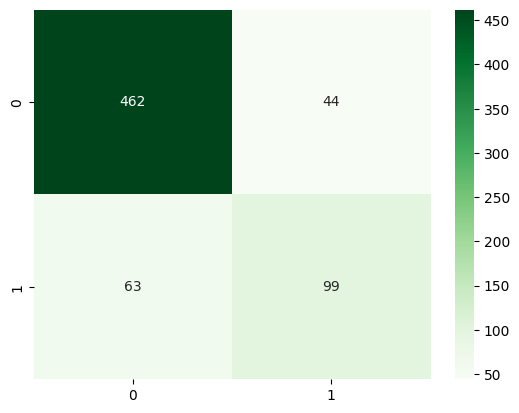

In [31]:
# Initializing XGBoost Classifier with 100 estimators and a maximum depth of 1
xgb = XGBClassifier(n_estimators=100, max_depth=1)

# Run the model and store the results
train_accuracy_xgb, test_accuracy_xgb, roc_auc_xgb, tt_xgb = run_model(xgb)

##### 9. Neural Network

Train Accuracy = 0.8269014612214313
Test Accuracy = 0.8488023952095808
ROC Area under Curve = 0.7386302639925829
Time taken = 1.6517150402069092
              precision    recall  f1-score   support

           0    0.86225   0.95257   0.90516       506
           1    0.77982   0.52469   0.62731       162

    accuracy                        0.84880       668
   macro avg    0.82104   0.73863   0.76624       668
weighted avg    0.84226   0.84880   0.83778       668



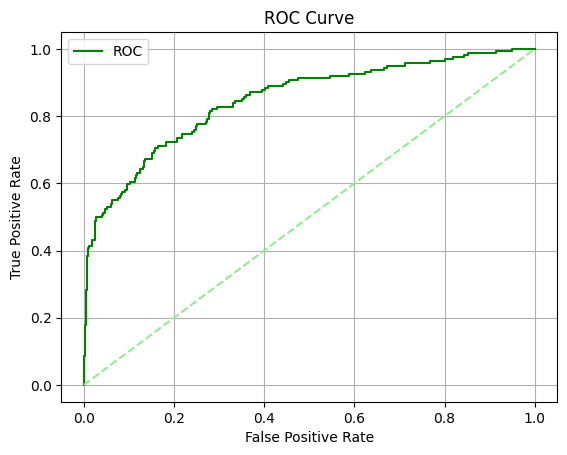

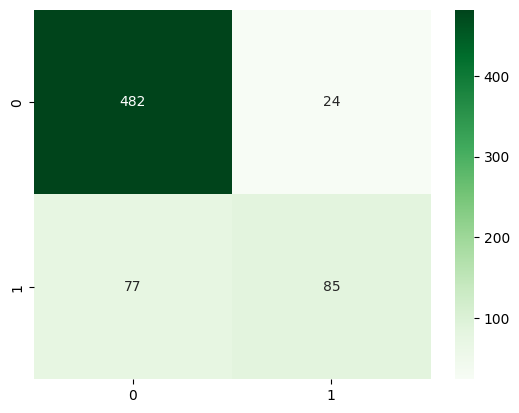

In [148]:
# Defining hyperparameters for the Multi-layer Perceptron (MLP) Classifier
params = {
    'hidden_layer_sizes': (128, 64, 32),  # Number of neurons in each hidden layer
    'activation': 'logistic',              # Activation function for the hidden layers
    'solver': 'adam',                     # Optimization algorithm
    'max_iter': 300                        # Maximum number of iterations
}

# Initialize MLP Classifier with the specified hyperparameters
nn = MLPClassifier(**params)

# Run the model and store the results
train_accuracy_nn, test_accuracy_nn, roc_auc_nn, tt_nn = run_model(nn)


##### 10. Light GBM

Train Accuracy = 0.84563506931435
Test Accuracy = 0.842814371257485
ROC Area under Curve = 0.7472673595862002
Time taken = 0.03300809860229492
              precision    recall  f1-score   support

           0    0.86924   0.93281   0.89990       506
           1    0.72800   0.56173   0.63415       162

    accuracy                        0.84281       668
   macro avg    0.79862   0.74727   0.76703       668
weighted avg    0.83499   0.84281   0.83545       668



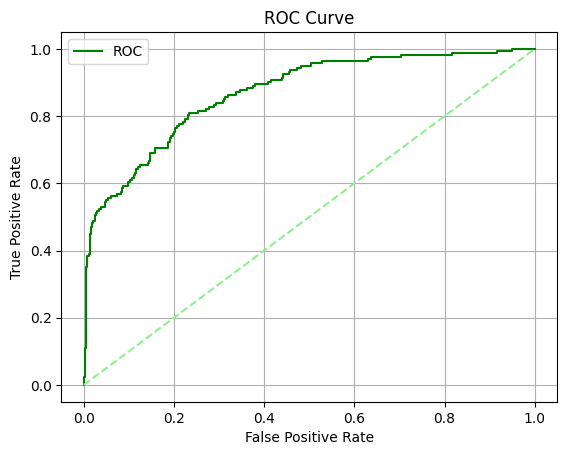

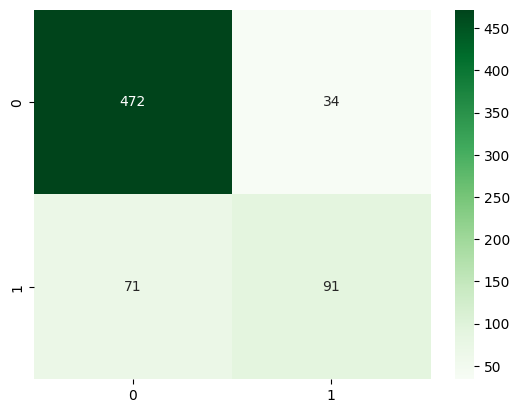

In [149]:
# Defining hyperparameters for the LightGBM Classifier
params = {
    'colsample_bytree': 0.95,       # Subsample ratio of columns when constructing each tree
    'max_depth': 1,                 # Maximum depth of tree
    'min_split_gain': 0.1,          # Minimum loss reduction required to make a further partition
    'n_estimators': 200,            # Number of boosting iterations
    'num_leaves': 50,               # Maximum number of leaves in one tree
    'reg_alpha': 1.2,               # L1 regularization term on weights
    'reg_lambda': 1.2,              # L2 regularization term on weights
    'subsample': 0.95,              # Subsample ratio of the training instance
    'subsample_freq': 20            # Frequence of subsample, <=0 means no enable
}

# Initializing LightGBM Classifier with the specified hyperparameters and turn off verbose output
lgbm = LGBMClassifier(**params, verbose=-1)

# Run the model and store the results
train_accuracy_lgbm, test_accuracy_lgbm, roc_auc_lgbm, tt_lgbm = run_model(lgbm)


##### 11. Catboost

Train Accuracy = 0.8298988385162982
Test Accuracy = 0.8473053892215568
ROC Area under Curve = 0.739740399160689
Time taken = 0.0695796012878418
              precision    recall  f1-score   support

           0    0.86331   0.94862   0.90395       506
           1    0.76786   0.53086   0.62774       162

    accuracy                        0.84731       668
   macro avg    0.81558   0.73974   0.76585       668
weighted avg    0.84016   0.84731   0.83697       668



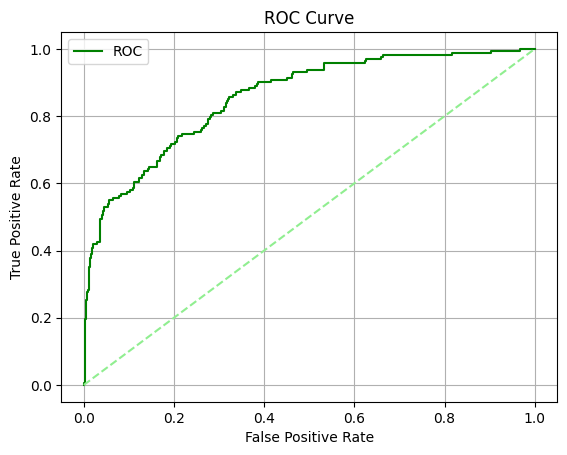

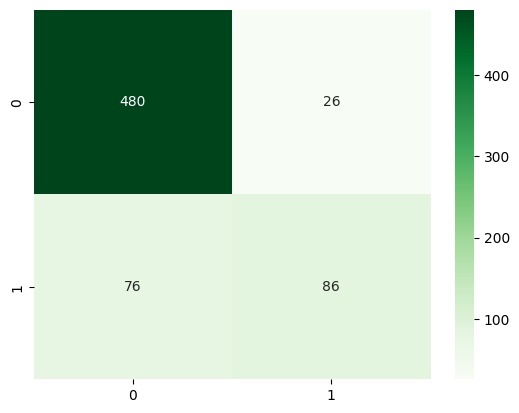

In [153]:
# Initializing CatBoost Classifier with specified hyperparameters
cb = CatBoostClassifier(learning_rate=0.001, iterations=50, max_depth=4, silent=True)

# Run the model using the defined function and store the results
train_accuracy_cb, test_accuracy_cb, roc_auc_cb, tt_cb = run_model(cb)


#### Model selection

In [160]:
# Analysis dictionary to store performance metrics for various models
analysis = {
    'Logistic Regression': {
        'Train Accuracy': train_accuracy_lr,
        'Test Accuracy': test_accuracy_lr,
        'Time Taken': tt_lr
    },
    'LDA': {
        'Train Accuracy': train_accuracy_lda,
        'Test Accuracy': test_accuracy_lda,
        'Time Taken': tt_lda
    },
    'KNN': {
        'Train Accuracy': train_accuracy_knn,
        'Test Accuracy': test_accuracy_knn,
        'Time Taken': tt_knn
    },
    'Random Forest': {
        'Train Accuracy': train_accuracy_rf,
        'Test Accuracy': test_accuracy_rf,
        'Time Taken': tt_rf
    },
    'Random Forest grid search': {
        'Train Accuracy': train_accuracy_gs,
        'Test Accuracy': test_accuracy_gs,
        'Time Taken': tt_gs
    },
    'Bagging': {
        'Train Accuracy': train_accuracy_bag,
        'Test Accuracy': test_accuracy_bag,
        'Time Taken': tt_bag
    },
    'AdaBoost': {
        'Train Accuracy': train_accuracy_ada,
        'Test Accuracy': test_accuracy_ada,
        'Time Taken': tt_ada
    },
    'Gradient Boosting': {
        'Train Accuracy': train_accuracy_xgb,
        'Test Accuracy': test_accuracy_xgb,
        'Time Taken': tt_xgb
    },
    'XGBoost': {
        'Train Accuracy': train_accuracy_xgb,
        'Test Accuracy': test_accuracy_xgb,
        'Time Taken': tt_xgb
    },
    'LightGBM': {
        'Train Accuracy': train_accuracy_lgbm,
        'Test Accuracy': test_accuracy_lgbm,
        'Time Taken': tt_lgbm
    },
    'CatBoost': {
        'Train Accuracy': train_accuracy_cb,
        'Test Accuracy': test_accuracy_cb,
        'Time Taken': tt_cb
    }
}

# Convert the dictionary to a pandas DataFrame and transpose it for better readability
analysis_df = pd.DataFrame(data=analysis)
analysis_df = analysis_df.transpose()

# Display the DataFrame
analysis_df

Train Accuracy  Test Accuracy  Time Taken
Logistic Regression              0.835894       0.832335    0.060007
LDA                              0.830274       0.823353    0.012048
KNN                              0.837018       0.820359    0.157043
Random Forest                    0.843012       0.856287    0.168999
Random Forest grid search        0.851630       0.847305    4.510576
Bagging                          0.843387       0.850299    0.410244
AdaBoost                         0.835144       0.848802   14.384565
Gradient Boosting                0.845260       0.839820    0.055000
XGBoost                          0.845260       0.839820    0.055000
LightGBM                         0.845635       0.842814    0.033008
CatBoost                         0.829899       0.847305    0.069580

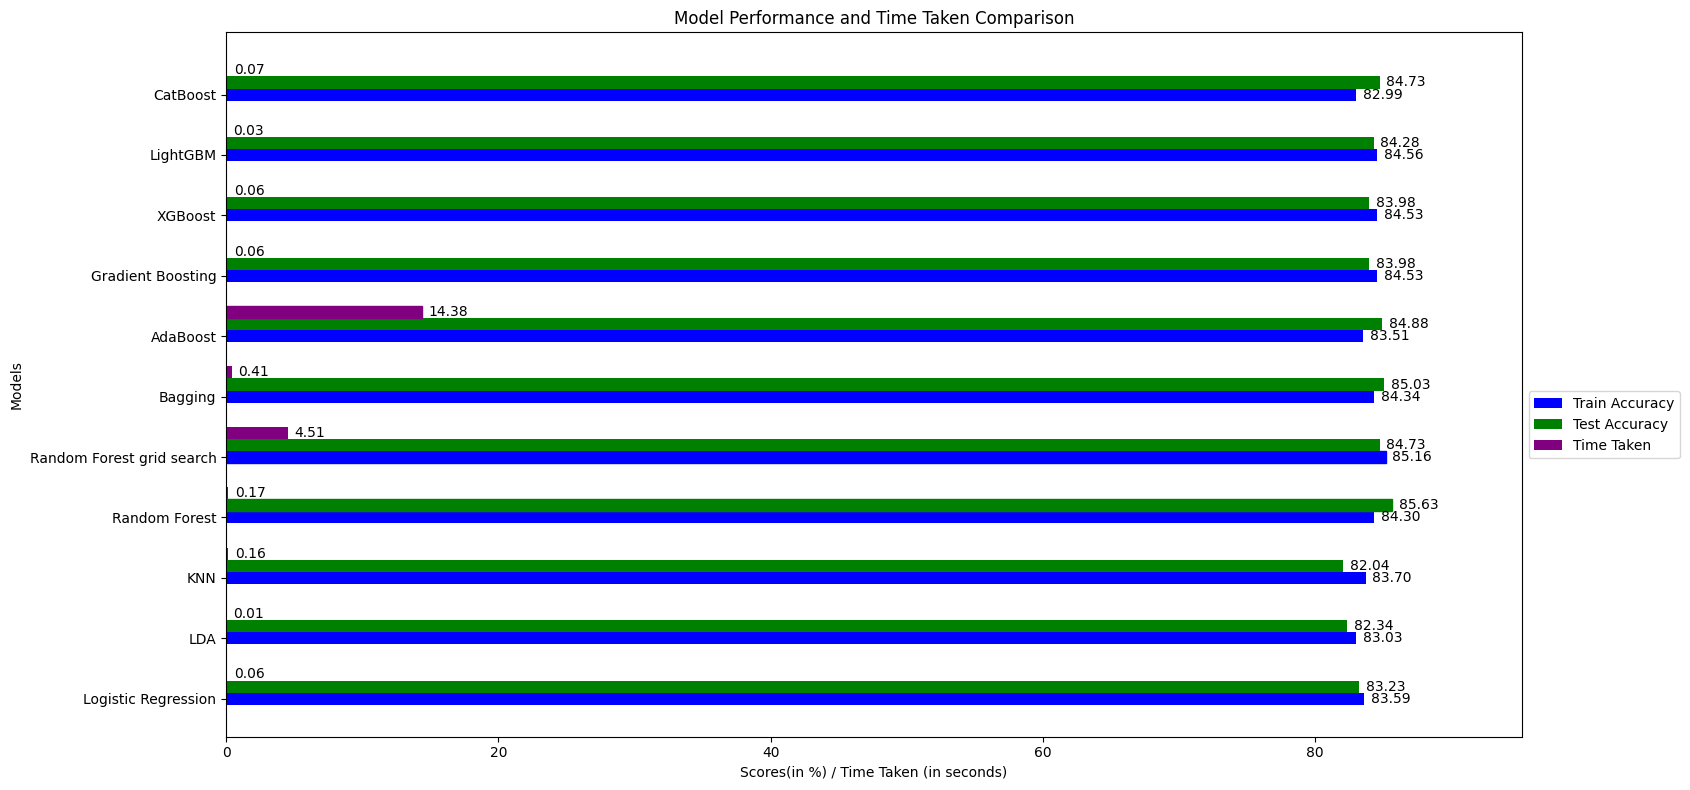

In [161]:
# Extract model names, train accuracies, test accuracies, and time taken from the analysis dataframe
models = analysis_df.index
train_accuracies = analysis_df['Train Accuracy'] * 100
test_accuracies = analysis_df['Test Accuracy'] * 100
time_taken = analysis_df['Time Taken']

# Find maximum values for scaling
max_train_accuracy = train_accuracies.max()
max_test_accuracy = test_accuracies.max()
max_time = time_taken.max()

# Set up the plot
fig, ax = plt.subplots(figsize=(17, 8))

# Define bar width and create an array of indices for the models
bar_width = 0.2
indices = np.arange(len(train_accuracies))

# Define colors and labels for the bar plot
colors = ['blue', 'green', 'purple']
labels = ['Train Accuracy', 'Test Accuracy', 'Time Taken']

# Plot bars for train accuracy, test accuracy, and time taken
for i, (data, label) in enumerate(zip([train_accuracies, test_accuracies, time_taken], labels)):
    bars = ax.barh(indices + i * bar_width, data, bar_width, label=label, color=colors[i])
    
    # Highlight the bar with maximum value
    max_index = np.argmax(data)
    bars[max_index].set_color(colors[i])

    # Add data labels to the bars
    for idx, bar in enumerate(bars):
        ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{data[idx]:.2f}', 
                va='center', ha='left')

# Customize the plot
ax.set_xlabel('Scores(in %) / Time Taken (in seconds)')
ax.set_ylabel('Models')
ax.set_title('Model Performance and Time Taken Comparison')
ax.set_yticks(indices)
ax.set_yticklabels(train_accuracies.index)  # Assuming 'Train Accuracy' column contains model names
ax.legend(loc='best', bbox_to_anchor=(1, 0.5))
ax.set_xlim(0, max_train_accuracy + 10)  # Adjust x-axis limit

plt.tight_layout()
plt.show()

### Got Best Result by Random Forest with accuracy score of Training `0.8430` and Testing `0.8563` and time tooked for training was `0.17s`. So I will choose `Random Forest`.

### 1. Your views about the problem statement?
The newspaper "The Daily Buzz" wants to predict when it will rain in Sydney using machine learning. This is a good idea because accurate weather forecasts help people plan their days better. The dataset they provided has a lot of useful information about weather conditions like temperature, humidity, and pressure By using different machine learning methods, we can make better predictions about rain. It's an interesting challenge also beneficial as it can help the people of Sydney prepare for rainy days or plan outdoor activities accordingly.

### 2. What will be your approach to solving this task?
To predict rainfall accurately for "The Daily Buzz" in Sydney, my approach involves first understanding and cleaning the weather dataset. Then, I'd perform exploratory data analysis to gain insights and select relevant features for modeling. Starting with simpler models like Logistic Regression and LDA, I'd then explore more complex models such as Random Forest and Gradient Boosting. Given the problem's emphasis on ensemble methods, I'd prioritize Random Forest. I'd further optimize the chosen models using hyperparameter tuning techniques. After training, I'd evaluate the models based on accuracy and other relevant metrics to identify the best-performing model. Finally, I'd deploy the selected model for real-time predictions, monitor its performance regularly, and update it with new data as needed to ensure accuracy and reliability.

### 3. What were the available ML model options you had to perform this task?
* Logistic Regression

* LDA

* KNN

* Random Forest

* Random Forest grid search

* Bagging

* AdaBoost

* Gradient Boosting

* XGBoost

* LightGBM

* CatBoost

* There are many more models available but I used these.

### 4. Which model’s performance is best and what could be the possible reason for that?
The model with the best performance based on test accuracy is Random Forest with a test accuracy of 0.8563. Random Forest is known for its robustness and ability to handle a variety of data types. Even I tried grid search optimization, but grid search takes more time due to trying several hyperparameters and I also tried changing hyper parameters several times but it was not performing well as Random Forest So I chose `Random Forest`. We can also choose other models like `Bagging`, `AdaBoost`. These models also perfomed well and have a slight difference between accuracies.

### 5. What steps can you take to improve this selected model’s performance even further?
To improve further the performance of model we can do the following:
* We can do Hyperparameter tuning with more options.
* We can transform the features to improve the performance.
* Performance can also be improved by getting some more features.